# 1. Ekstraksi Fitur protein dari protein berbentuk file FASTA menjadi file CSV untuk melakukan klasifikasi

In [33]:
pip install discere


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for discere from https://files.pythonhosted.org/packages/ee/d4/90b5ec358a2925dee44f6fc9c3bb4069f0192907cd0d0f291637ce5d856b/discere-0.0.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [48]:
import discere.discere as di

di.extract_feature('C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/positif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/negatif.fasta',
                   'C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein')

Processing fasta files....
Cleaning existing data...
Generating intermediate files...
Reading data...
Clearing existing files...
C:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/output/
['@relation Aminacidcomposition', '@attribute A numeric', '@attribute R numeric', '@attribute N numeric', '@attribute D numeric', '@attribute C numeric', '@attribute E numeric', '@attribute Q numeric', '@attribute G numeric', '@attribute H numeric', '@attribute I numeric', '@attribute L numeric', '@attribute K numeric', '@attribute M numeric', '@attribute F numeric', '@attribute P numeric', '@attribute S numeric', '@attribute T numeric', '@attribute W numeric', '@attribute Y numeric', '@attribute V numeric', '@attribute class {serk,loc}', '@data']
Feature extraction complete...
Extracted features are saved inC:/Users/BIOINFO 2/Documents/Skripsi Muhammad Rayhanafraa Gibran Maulana/protein/ directory in .txt, .arff and .csv formats


# 2. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2.1. Read file csv

In [2]:
kolom = [f'fitur-{i+1}' for i in range(28)]
len(kolom)

28

In [3]:
#29287 pneumonia
#38157
print('pneumonia = ',29287)
print('tbc = ',38157-29287)

pneumonia =  29287
tbc =  8870


In [4]:
df=pd.read_csv('tain_DL.csv',header=None)
df.columns = kolom
df


,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27,fitur-28
0,30,3,23,22,9,18,8,33,20,30,...,0,7,0.050,0.345,0.264,0.366,5.685,35450.59,48.73,1
1,29,4,21,19,11,18,6,27,21,28,...,0,11,0.069,0.320,0.279,0.379,5.925,35124.94,40.29,1
2,22,4,26,27,16,27,8,20,31,25,...,3,25,0.119,0.295,0.292,0.373,5.414,41959.52,31.36,1
3,24,10,25,35,9,30,12,29,27,47,...,0,13,0.055,0.377,0.259,0.342,5.406,45144.32,42.14,1
4,23,6,19,26,14,19,9,24,24,31,...,3,12,0.080,0.321,0.249,0.360,7.114,41293.92,36.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38152,12,2,14,6,7,16,4,2,2,24,...,1,7,0.087,0.273,0.297,0.419,5.489,18981.48,36.47,0
38153,58,3,26,23,11,49,10,19,10,31,...,4,8,0.055,0.332,0.327,0.310,5.112,43345.67,35.80,0
38154,24,4,18,10,6,17,7,6,2,13,...,2,5,0.070,0.274,0.323,0.355,4.386,19556.32,10.35,0
38155,55,2,12,13,22,36,10,34,4,52,...,12,7,0.101,0.345,0.241,0.448,7.169,43728.09,33.92,0


# 3. EDA
## 3.1. Melihat persebaran untuk masing-masing fitur menggunakan SwarmPlot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

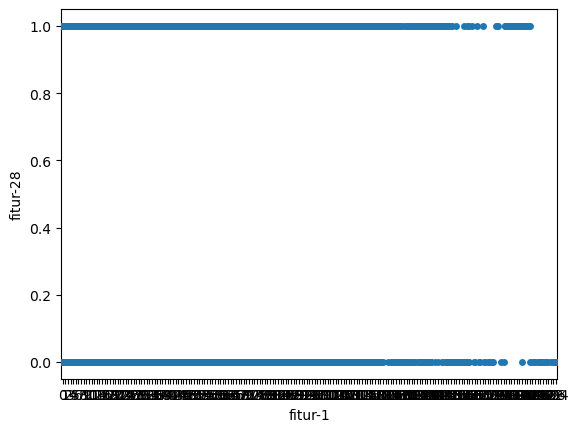

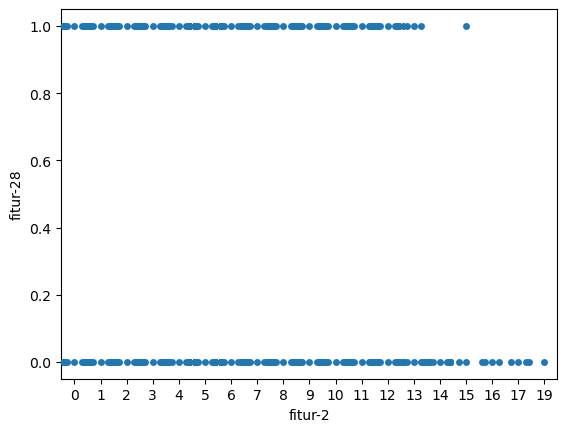

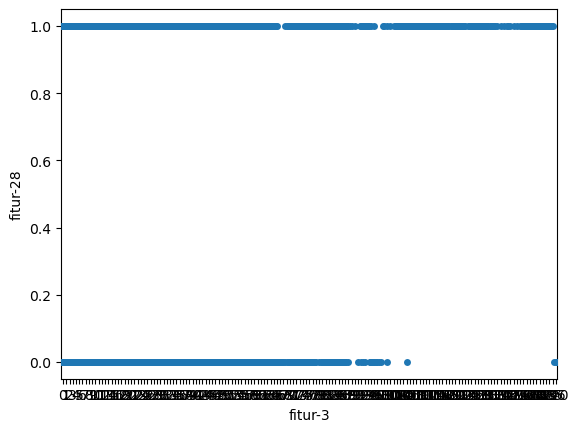

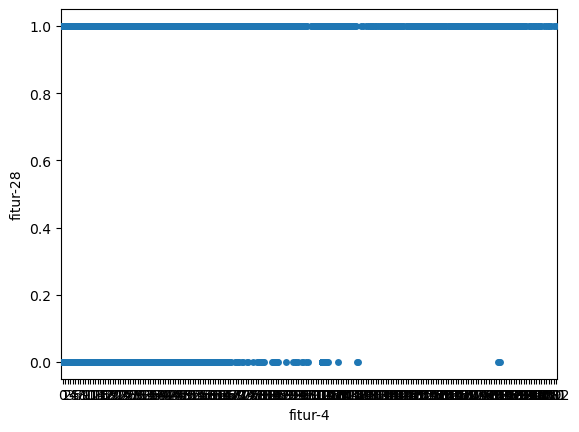

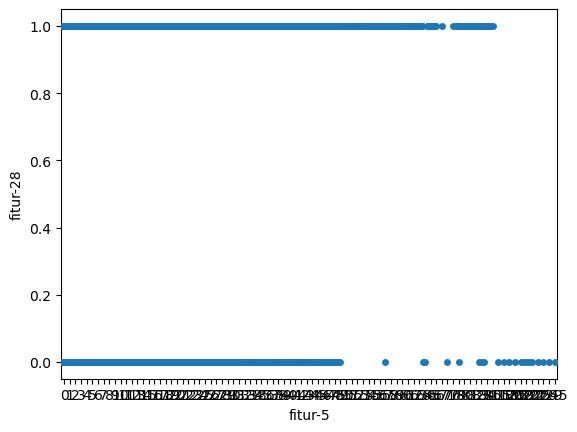

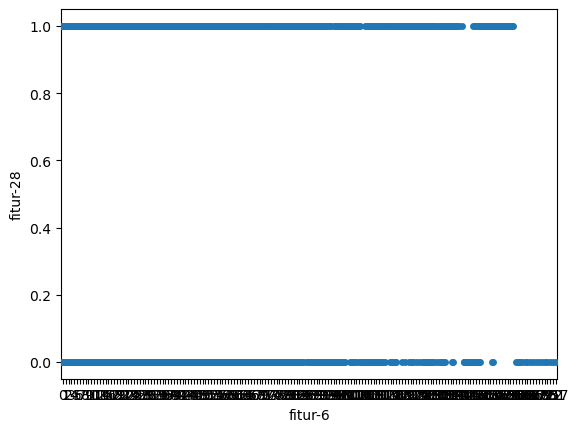

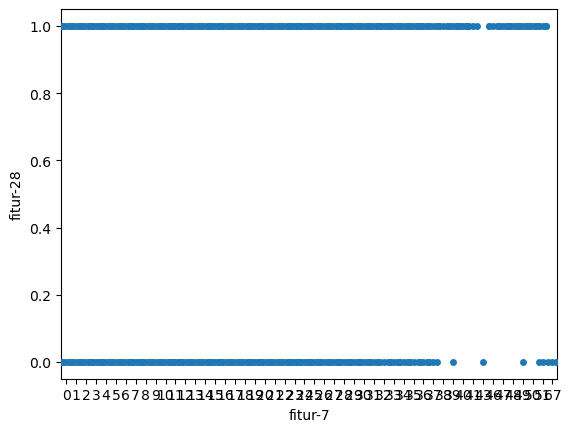

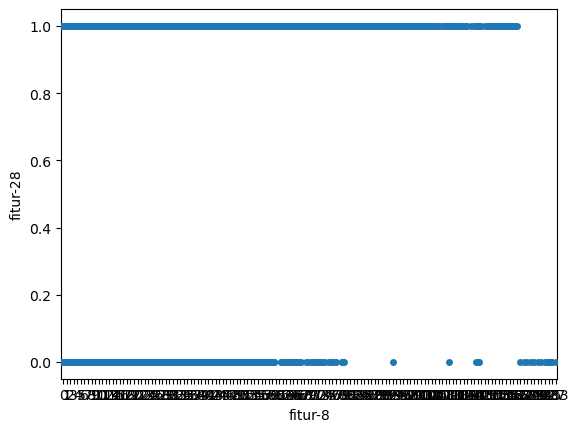

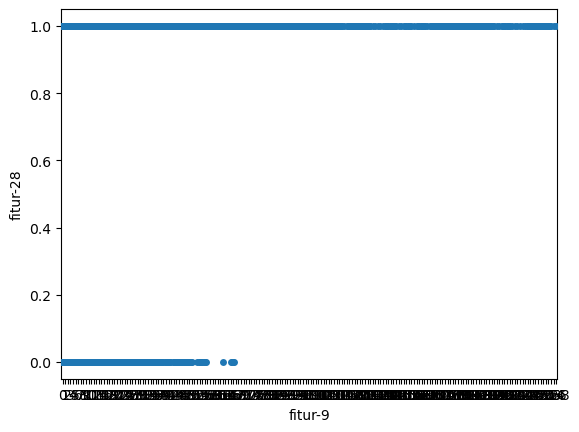

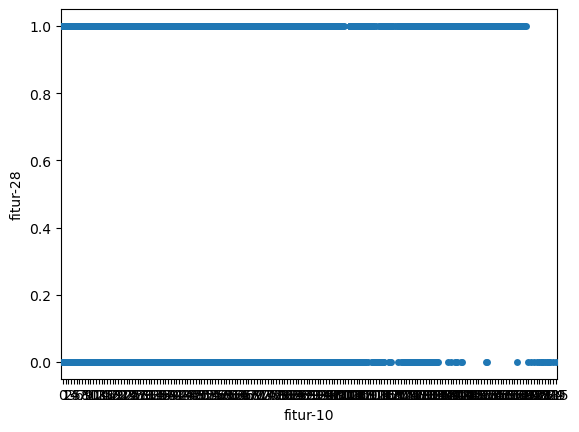

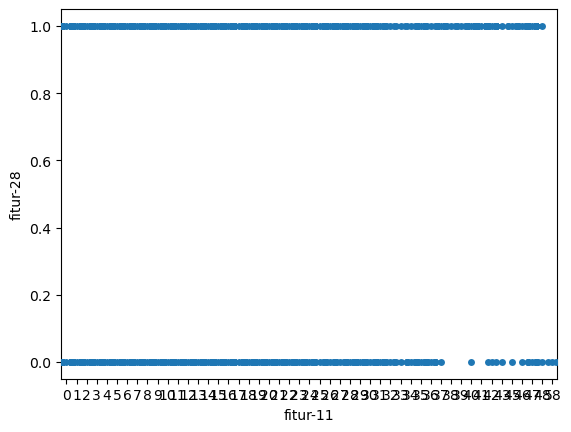

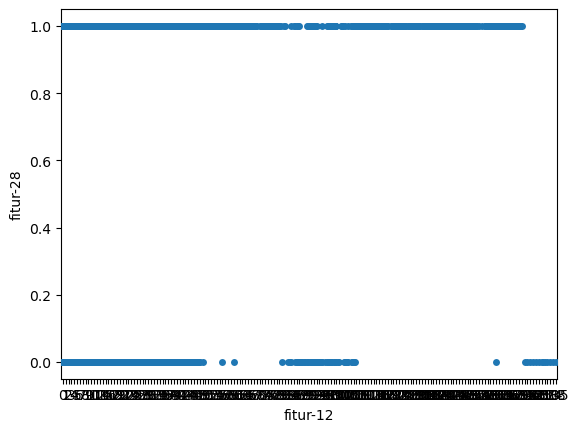

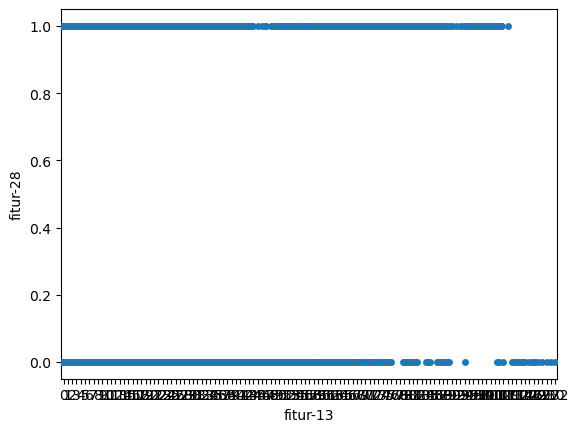

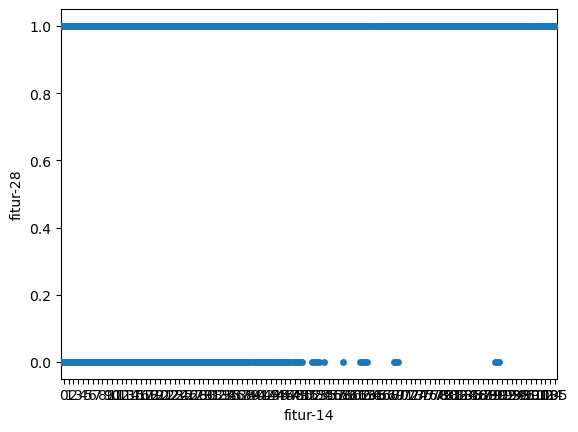

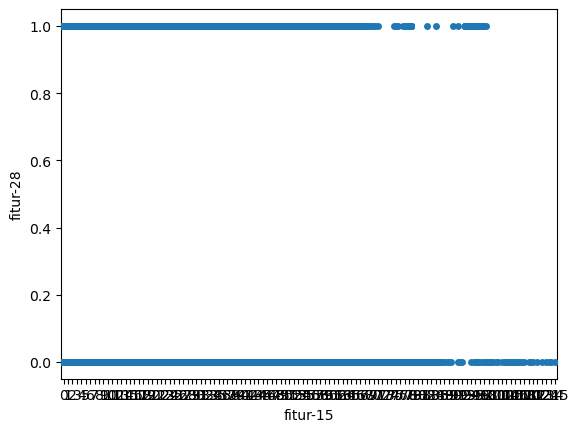

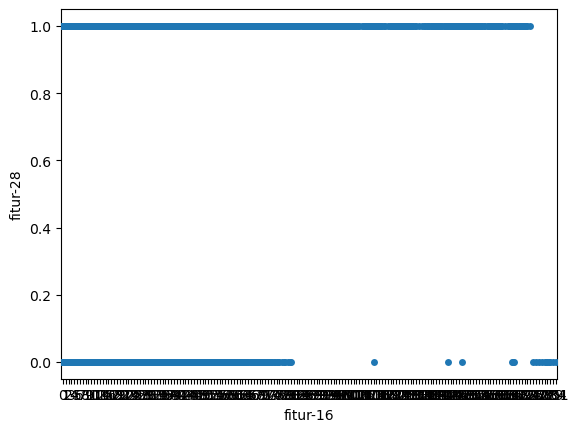

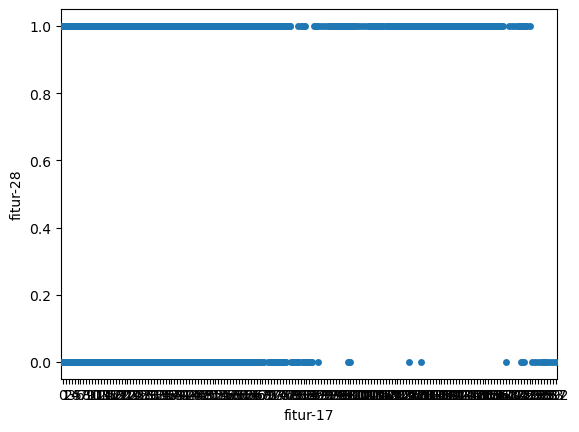

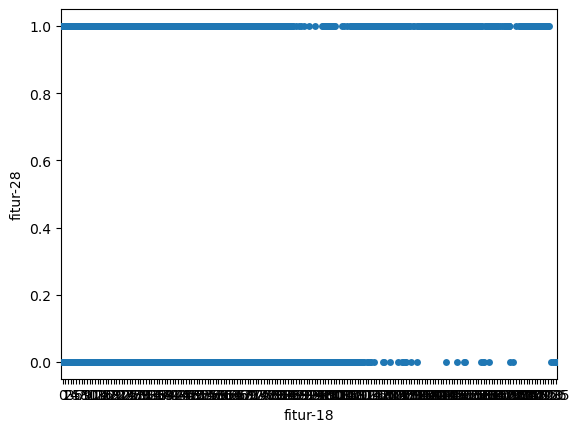

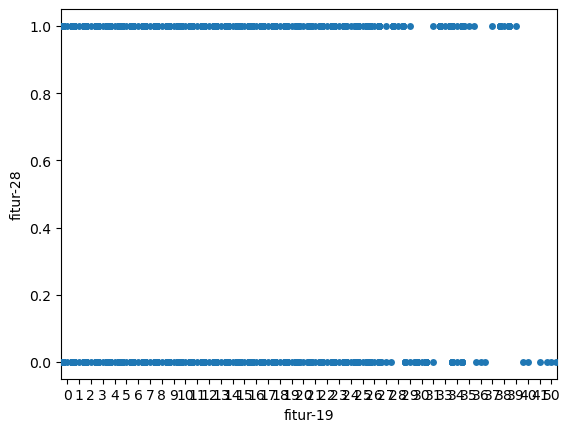

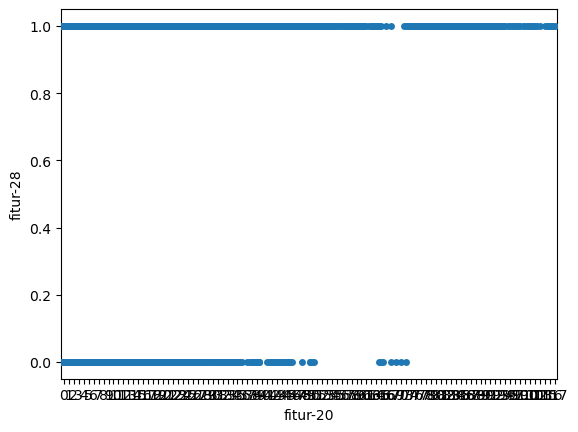

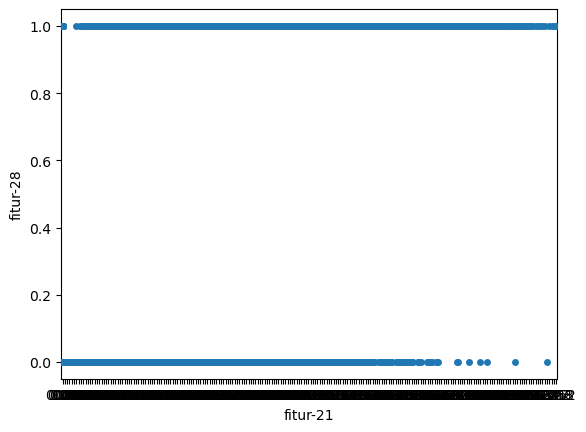

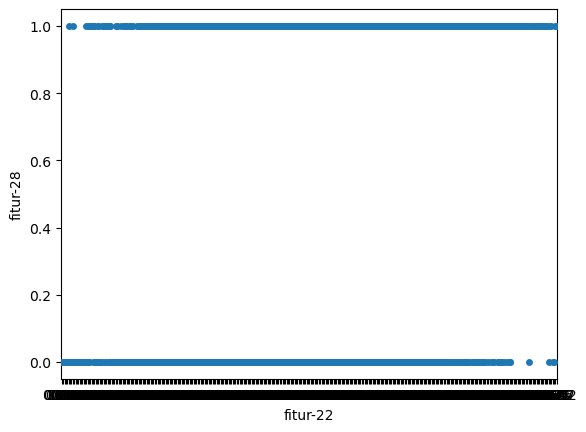

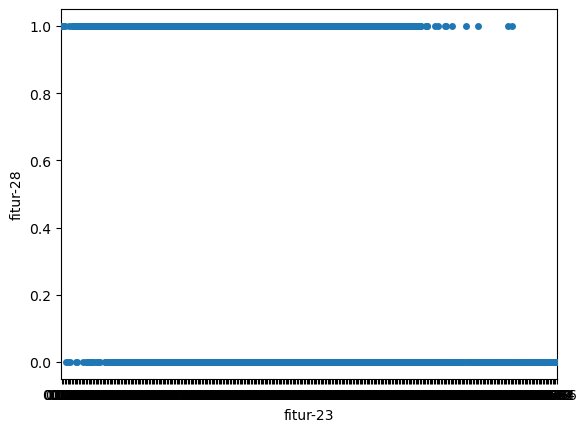

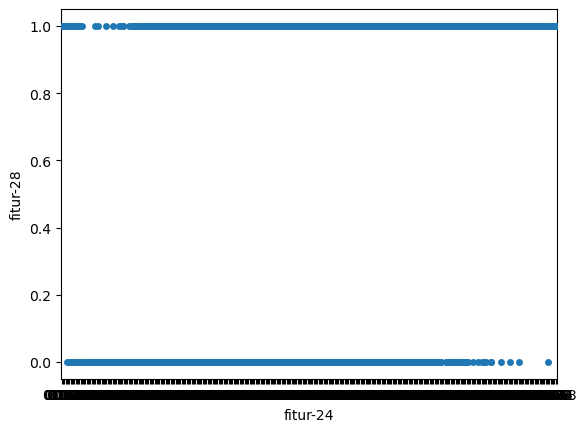

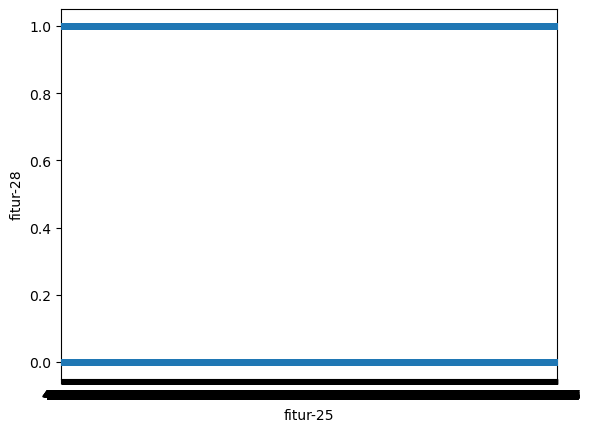

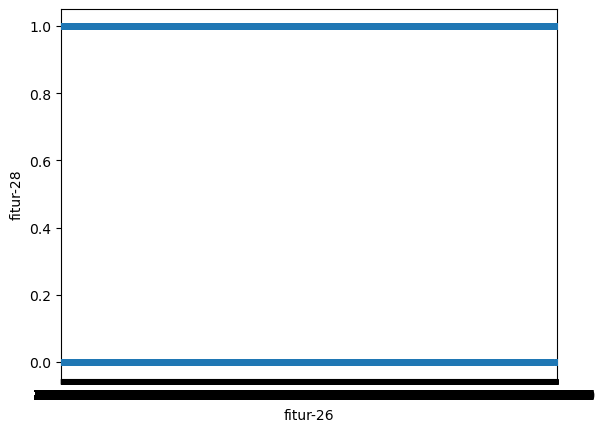

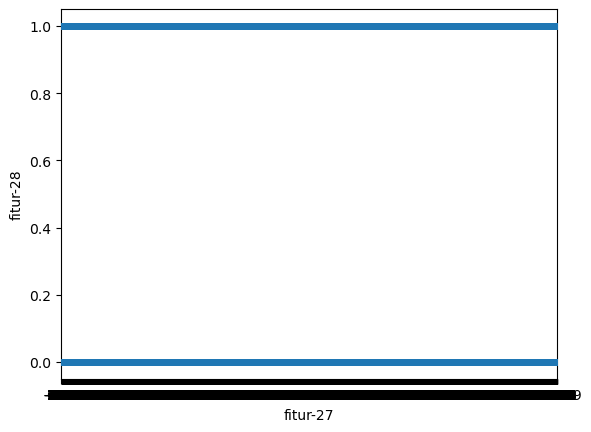

In [5]:
kolomeda =[f'fitur-{i+1}' for i in range(27)]
for i, col in enumerate(kolomeda):
    plt.figure(i)
    sns.swarmplot(data=df, x=col, y='fitur-28')

# 3.Memisahkan antara variabel bebas dan terkait

In [5]:
X=df.drop(['fitur-28'],axis=1)
y=df['fitur-28']

# 4. Eksperimen dan hasil

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.set_output(transform='pandas')

StandardScaler()

## 4.1. Train:Test = 80:20 dan Membuat model SVM

### Splitting

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Standarisasi

In [44]:
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [45]:
x_train

,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-18,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27
13302,-0.061616,0.842157,0.111590,0.171487,-0.494510,-0.061505,0.015422,-0.244226,-0.198054,-0.200099,...,-0.214614,0.619232,0.295386,0.389805,0.172105,0.296254,-0.257196,-0.963664,-0.129249,0.677917
34488,1.432425,0.842157,-0.186700,-0.874822,0.138418,1.135774,0.165866,-0.895402,-0.742395,0.144487,...,0.496936,0.823861,-0.015569,-0.039843,-1.404090,1.794773,-0.394259,1.186485,0.142470,-0.518528
5093,0.857794,-0.901060,1.752186,1.489061,0.613115,1.383487,1.068529,1.763564,1.201680,1.331395,...,1.742149,-0.403909,0.450863,-0.965240,0.220603,-0.319210,-0.237615,-0.254943,1.426335,-0.156654
8846,-1.249187,1.277961,-0.683850,-0.913575,-0.573626,-0.804644,-0.135021,-1.112460,-0.431343,-0.812697,...,-1.015107,-0.608537,-0.482000,1.183002,-1.913323,-0.372728,-0.590065,2.051114,-0.800516,0.743507
24441,-0.712865,-0.901060,-0.584420,-0.526053,-0.731858,-0.350504,-0.285465,-0.678343,-0.586869,-0.927559,...,-0.525917,-0.403909,-0.870693,-0.766941,-0.652367,1.875051,-0.785870,-0.650137,-0.719850,-0.737914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.559630,-0.901060,-0.932425,-0.603557,-0.810974,-0.887215,-0.736797,-1.058195,-0.781277,-1.042421,...,-1.104051,-0.199281,-1.026170,-0.105943,1.651303,-0.185413,-0.531323,-1.051041,-0.943605,-0.778625
6265,-0.789482,-0.029452,-0.236415,-0.526053,-0.731858,-0.598217,-0.285465,0.135626,-0.236936,-0.736123,...,-0.570389,-0.608537,-0.559739,-0.700841,-0.773612,-0.238932,0.663090,-0.468530,-0.548696,-1.147284
11284,-0.942717,-0.901060,-0.435275,-0.487301,-0.336278,-0.556931,-0.586353,-0.841137,-0.275817,-0.659548,...,-0.659332,0.005348,-0.326523,1.249102,-0.288629,0.911717,-0.100551,-0.213825,-0.605517,-1.361015
860,-0.521321,-0.901060,-0.733565,-0.836070,1.404275,0.310064,0.015422,0.027097,-0.431343,0.335924,...,0.007746,0.209976,-0.248784,2.240598,-0.579619,-0.640321,2.542821,1.377229,-0.256361,-1.733067


In [46]:
x_test

,fitur-1,fitur-2,fitur-3,fitur-4,fitur-5,fitur-6,fitur-7,fitur-8,fitur-9,fitur-10,...,fitur-18,fitur-19,fitur-20,fitur-21,fitur-22,fitur-23,fitur-24,fitur-25,fitur-26,fitur-27
10098,3.424480,-0.901060,7.668274,4.938006,5.122730,5.140466,3.926961,7.027231,8.744691,3.437200,...,4.010215,2.665515,5.426131,-0.006793,-0.215882,1.741255,-0.962095,-0.143010,5.873933,-0.784279
6267,-0.866100,-0.029452,-0.385560,-0.681061,-0.652742,-0.556931,-0.135021,-0.569814,-0.275817,-0.046950,...,-0.748276,-0.813165,-0.559739,-0.766941,0.244852,0.028661,0.212737,0.465200,-0.523951,-0.431452
30756,1.087646,0.406352,-0.186700,-0.061026,-0.019814,0.681633,0.165866,0.081361,-0.120291,0.106199,...,0.585880,0.005348,-0.326523,-0.700841,0.560091,-0.827636,-0.296357,1.345248,0.174977,-0.324021
18555,0.474706,-0.465256,-0.286130,0.171487,-0.019814,-0.226647,-0.435909,0.189891,0.035235,-0.008663,...,-0.392501,-0.608537,0.450863,0.323705,1.505808,-1.416340,0.173576,-0.617584,-0.039625,-0.236945
15743,0.053310,-0.465256,-0.286130,-0.138531,-0.019814,-0.309218,0.015422,-0.081432,-0.198054,-0.391536,...,-0.259085,-0.813165,-0.870693,-0.833040,0.778333,-0.185413,-0.805451,-0.242379,-0.296462,0.080825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,0.934411,-0.465256,1.553326,1.876583,1.008695,2.374338,1.670304,1.112389,2.134836,1.446257,...,1.742149,1.437745,1.772418,-0.271192,-0.531121,1.259588,-0.805451,0.275599,1.988627,0.245930
8218,0.474706,-0.901060,0.111590,0.132734,-0.178046,0.681633,-0.736797,0.027097,0.385168,-0.046950,...,0.274577,-0.199281,-0.559739,-0.833040,1.336064,0.884958,-0.531323,-0.756359,-0.078338,-1.675393
22723,-0.597939,-0.029452,-0.286130,-0.603557,-0.890090,-0.515646,-0.435909,-0.461285,-0.509106,-0.659548,...,-0.348029,-0.608537,-0.482000,-0.833040,-0.919107,0.724402,-0.276776,-0.752361,-0.565257,-0.344376
16381,-0.789482,-0.029452,-0.584420,-0.099779,-0.652742,-0.639502,0.015422,-0.407020,-0.198054,-0.391536,...,-0.792748,-0.608537,-0.171046,-0.105943,0.438845,-0.827636,-0.237615,-0.080761,-0.453474,0.138499


In [47]:
print(f'Label 1 pada data training sebanyak {y_train.value_counts()[1]} dengan rasio {(y_train.value_counts()[1]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data training sebanyak {y_train.value_counts()[0]} dengan rasio {(y_train.value_counts()[0]/(y_train.value_counts()[1]+y_train.value_counts()[0]))*100:.4f}%')
print(f'Label 1 pada data testing sebanyak {y_test.value_counts()[1]} dengan rasio {(y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')
print(f'Label 0 pada data testing sebanyak {y_test.value_counts()[0]} dengan rasio {(y_test.value_counts()[0]/(y_test.value_counts()[1]+y_test.value_counts()[0]))*100:.4f}%')

Label 1 pada data training sebanyak 20525 dengan rasio 76.8468%
Label 0 pada data training sebanyak 6184 dengan rasio 23.1532%
Label 1 pada data testing sebanyak 8762 dengan rasio 76.5374%
Label 0 pada data testing sebanyak 2686 dengan rasio 23.4626%


### Melakukan hyperparameter untuk model SVM menggunakan GridSearch

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [49]:
svm_classifier = SVC()

In [50]:
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [i for i in range(1,100)] #1001
}

In [51]:
grid_search=GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [52]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [53]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'C': 38, 'kernel': 'rbf'}
Best Accuracy: 98.82%


### Membuat model SVM menggunakan parameter terbaik berdasarkan hasil GridSearch dengan Cross Validation k=5 dan fokus terhadap akurasi

In [54]:
svm_classifierfinal=SVC(C=38,kernel='rbf')

In [55]:
svm_classifierfinal.fit(x_train,y_train)

SVC(C=38)

In [56]:
import joblib

joblib.dump(svm_classifierfinal, f'SVM.pkl')

['SVM.pkl']

### Evaluasi Metrik untuk model SVM

In [57]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rc
def spec(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity


Classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2686
           1       0.99      0.99      0.99      8762

    accuracy                           0.99     11448
   macro avg       0.99      0.98      0.99     11448
weighted avg       0.99      0.99      0.99     11448

Nilai Akurasi untuk SVM  0.989517819706499
Nilai Sensitivitas untuk SVM  0.994864186258845
Nilai Spesifisitas untuk SVM  0.9720774385703649
Nilai ROC-AUC untuk SVM  0.9834708124146049


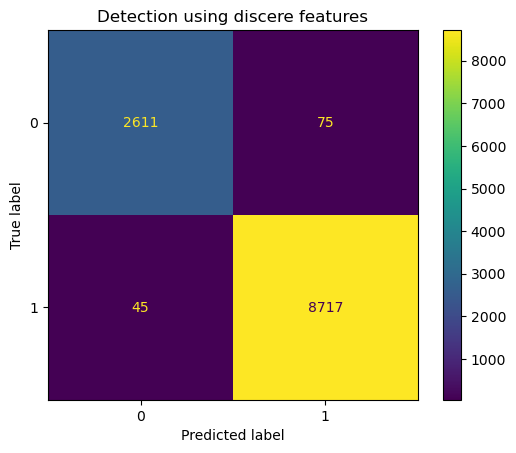

In [58]:
y_pred_svm=svm_classifierfinal.predict(x_test)
cm=confusion_matrix(y_test,y_pred_svm)
cm_display=ConfusionMatrixDisplay(cm)
print(f"\nClassification report")
print(classification_report(y_test, y_pred_svm))
cm_display.plot()
cm_display.ax_.set_title(f'Detection using discere features')
print("Nilai Akurasi untuk SVM ",acc(y_test,y_pred_svm))
print("Nilai Sensitivitas untuk SVM ",rc(y_test,y_pred_svm))
print("Nilai Spesifisitas untuk SVM ",spec(y_test,y_pred_svm))
print("Nilai ROC-AUC untuk SVM ",rocauc(y_test,y_pred_svm))

### Membuat model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [59]:
from sklearn.ensemble import BaggingClassifier

In [60]:
clf=[]
for i in range(54):
    clf.append(BaggingClassifier(estimator=svm_classifierfinal,n_estimators=i+1,random_state=42).fit(x_train, y_train))

### Evaluasi metrik model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54

In [61]:
y_pred=[]
for i in range(54):
    y_pred.append(clf[i].predict(x_test))


Classification report 1-estimator
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2686
           1       0.99      0.99      0.99      8762

    accuracy                           0.99     11448
   macro avg       0.98      0.98      0.98     11448
weighted avg       0.99      0.99      0.99     11448


Classification report 2-estimator
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2686
           1       0.99      0.99      0.99      8762

    accuracy                           0.99     11448
   macro avg       0.98      0.98      0.98     11448
weighted avg       0.99      0.99      0.99     11448


Classification report 3-estimator
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2686
           1       0.99      0.99      0.99      8762

    accuracy                           0.99     11448
   macro avg       0.98

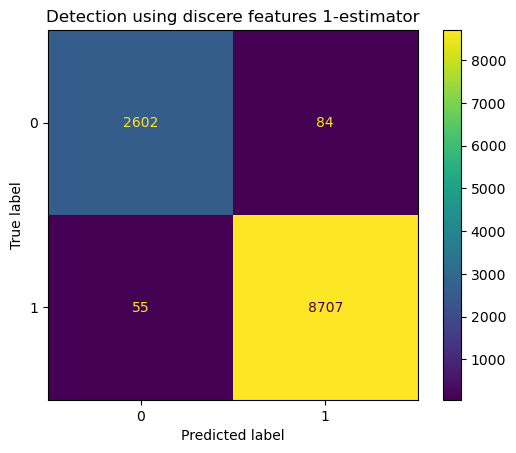

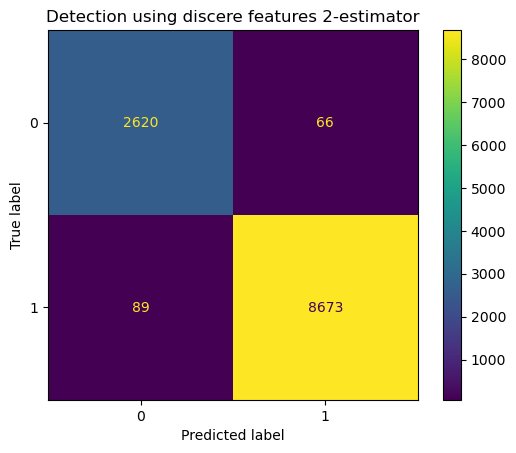

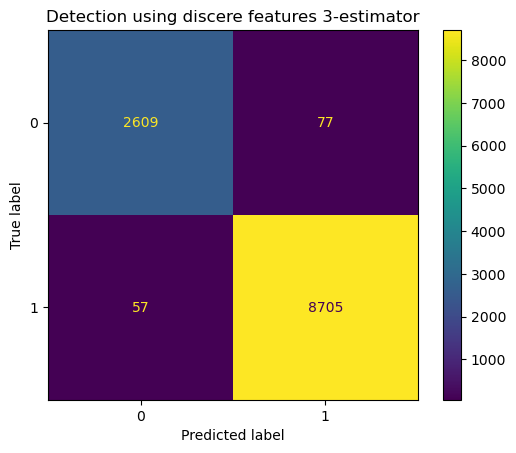

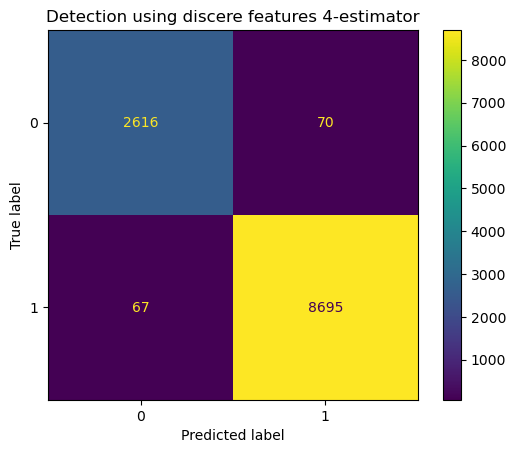

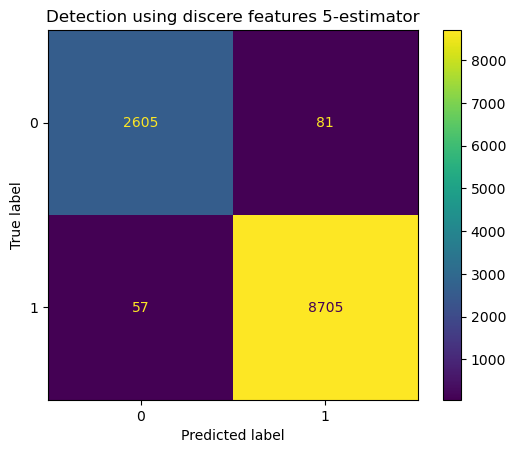

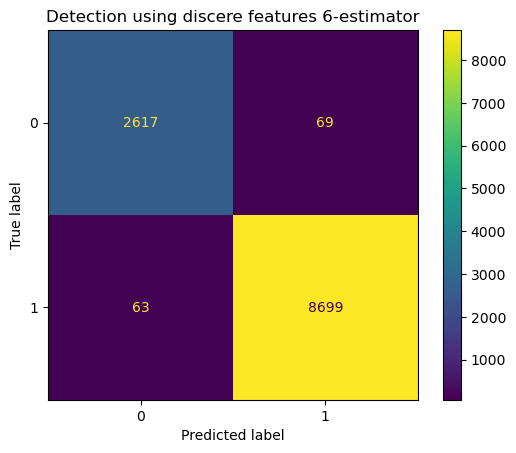

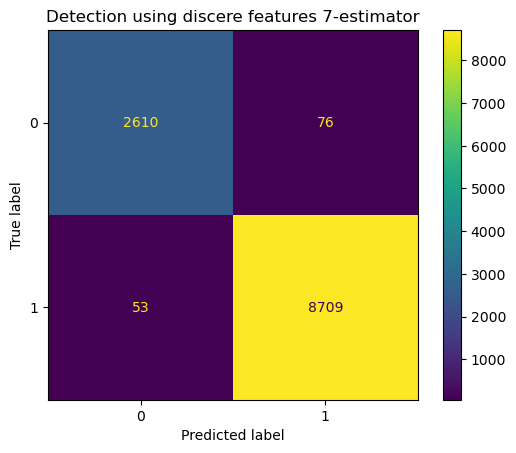

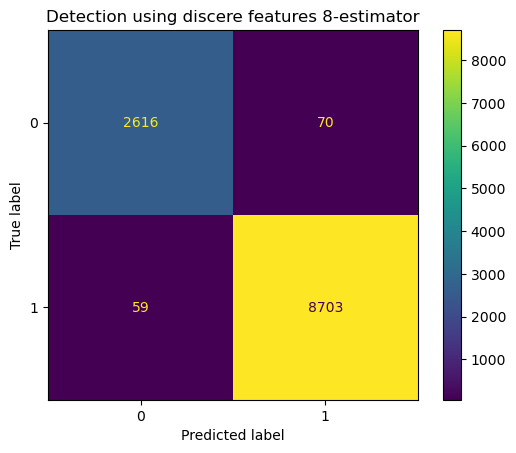

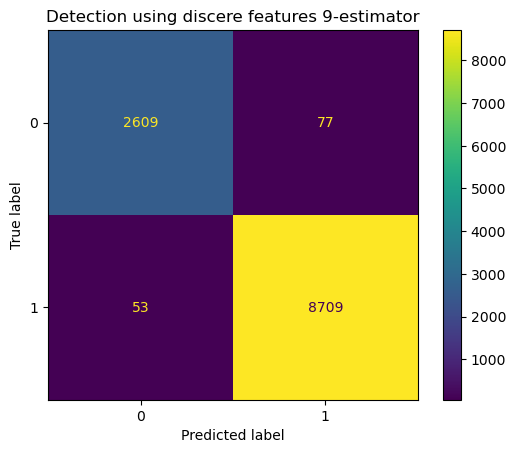

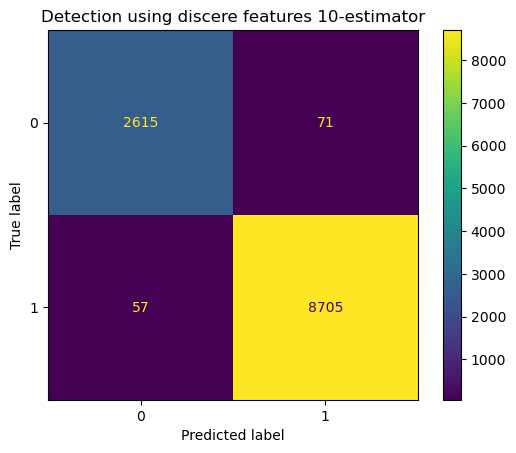

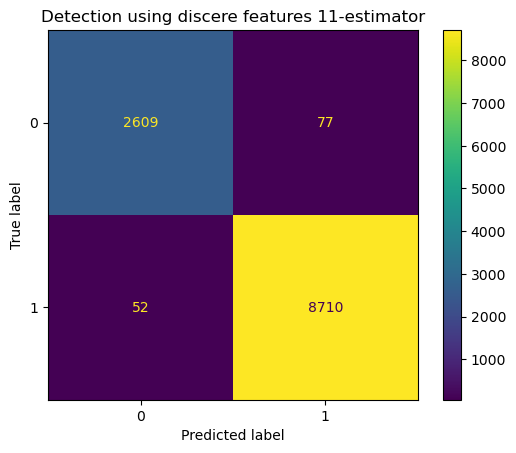

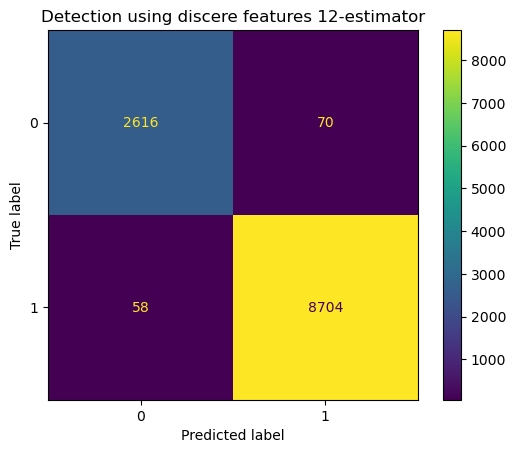

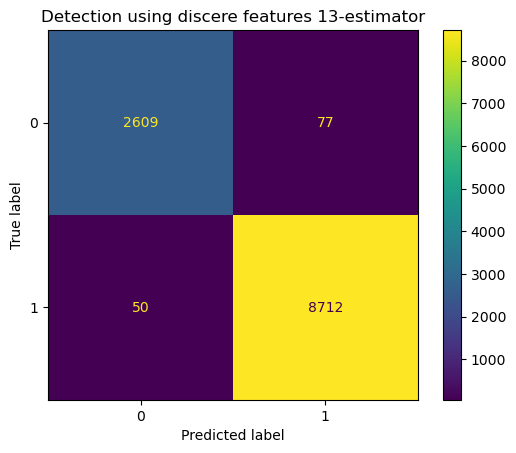

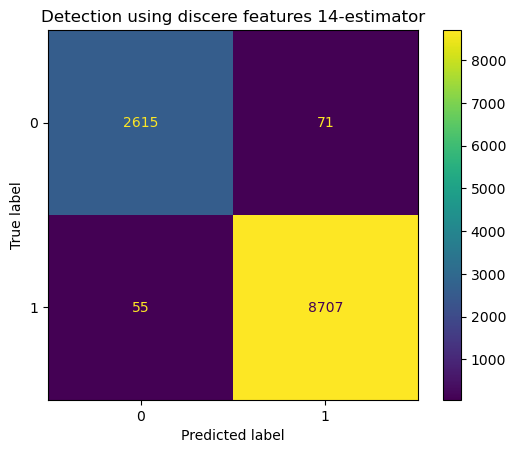

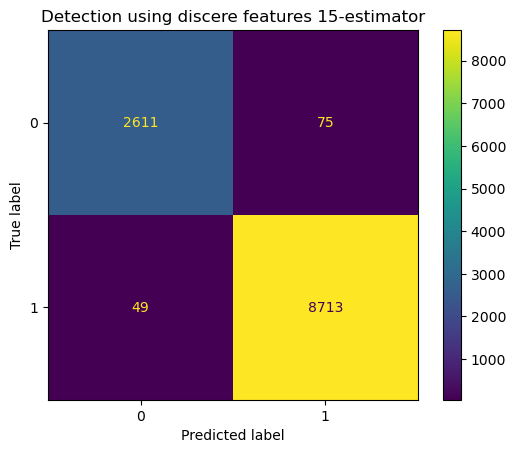

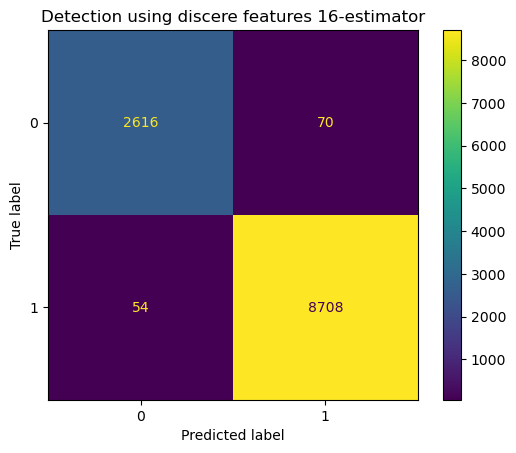

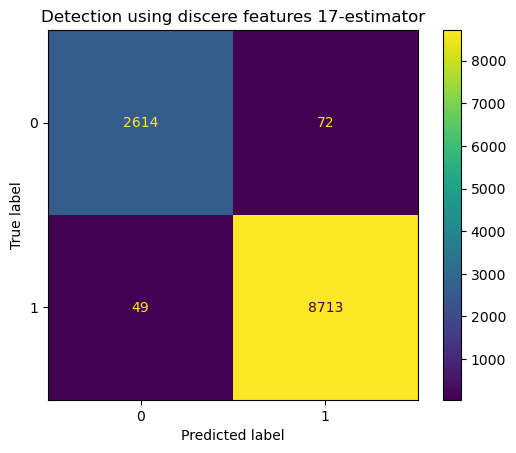

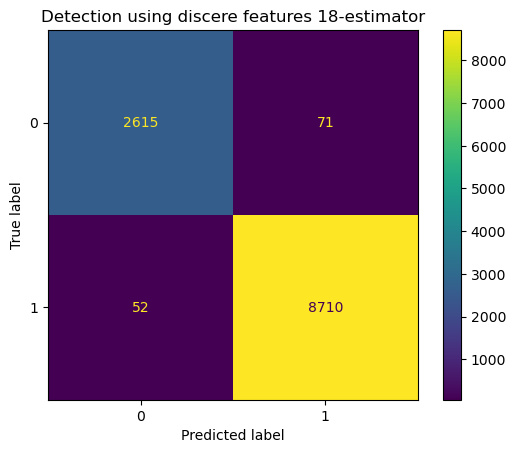

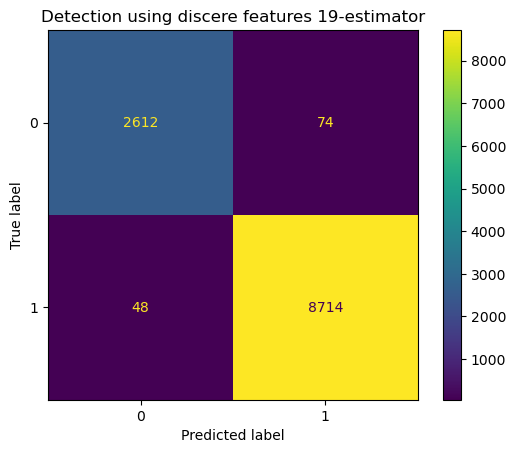

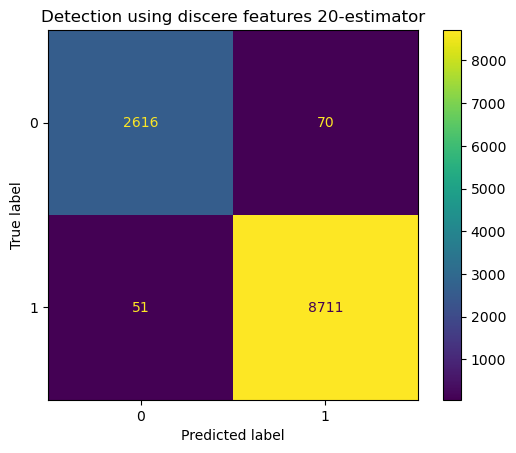

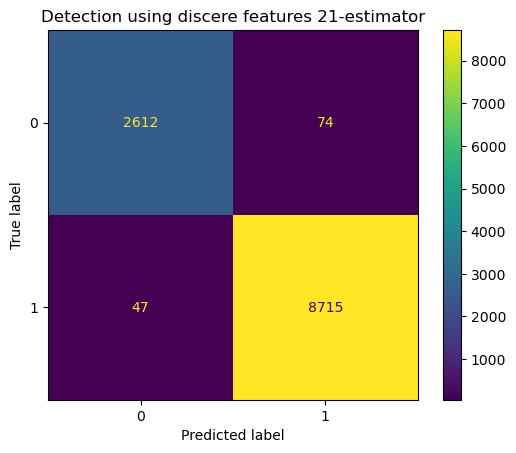

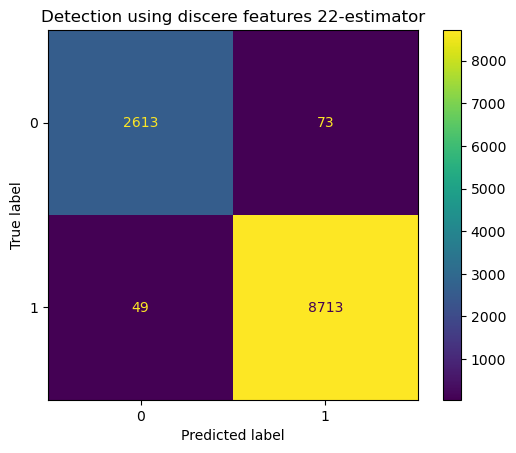

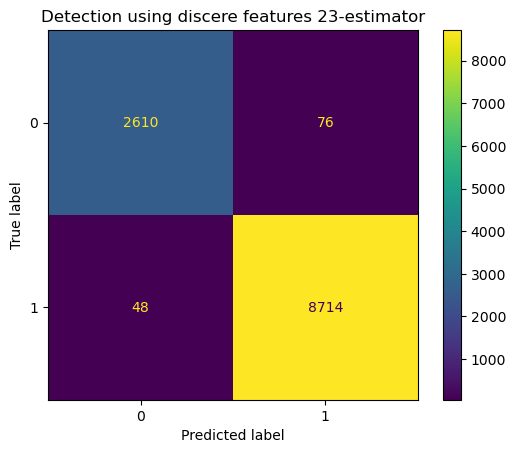

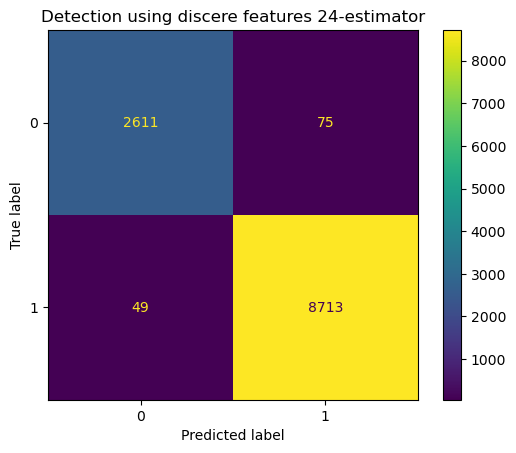

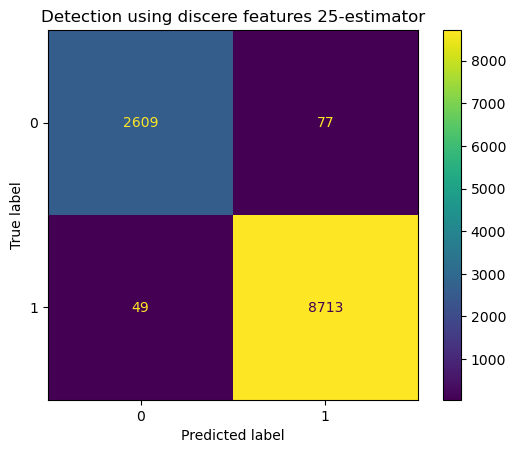

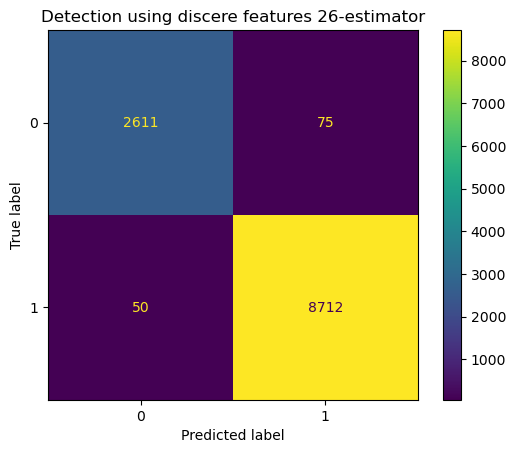

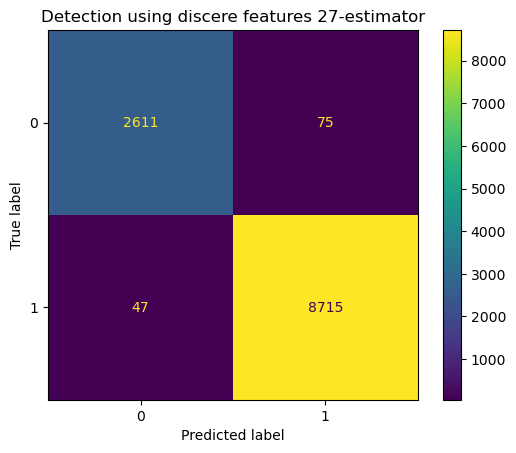

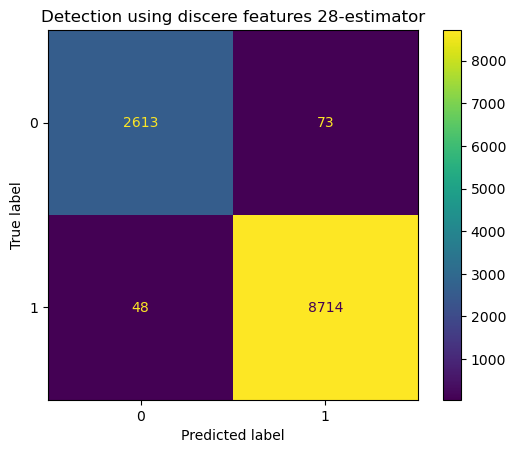

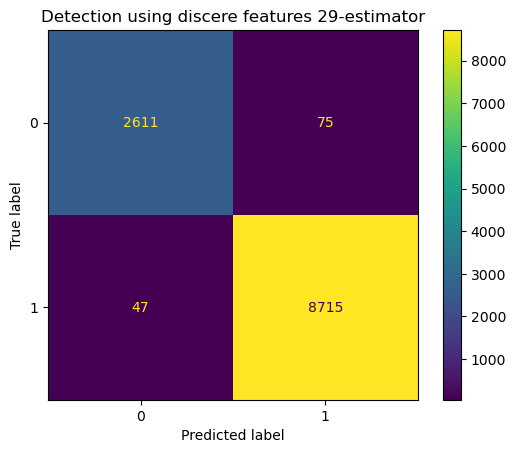

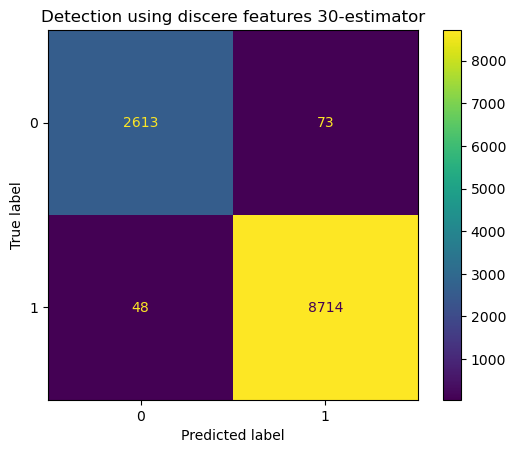

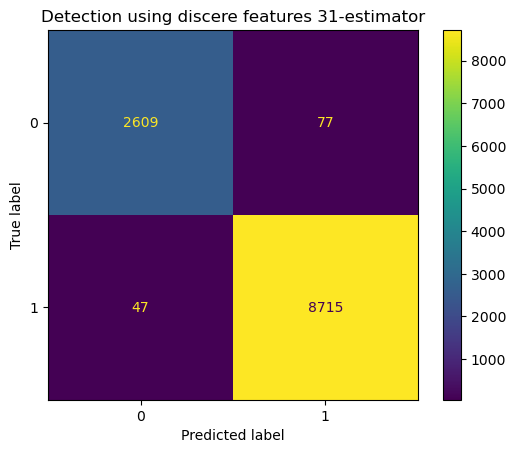

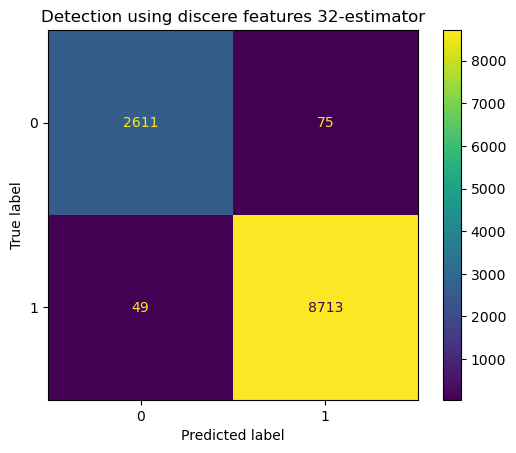

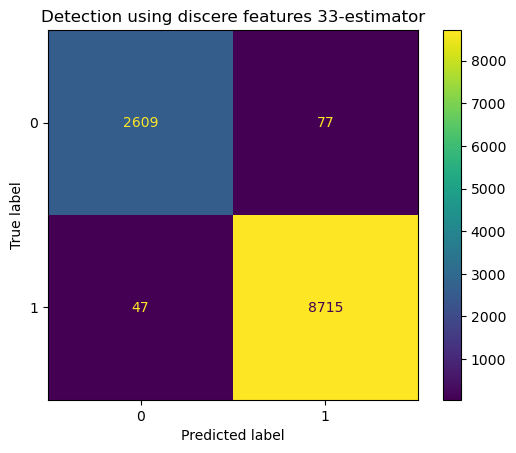

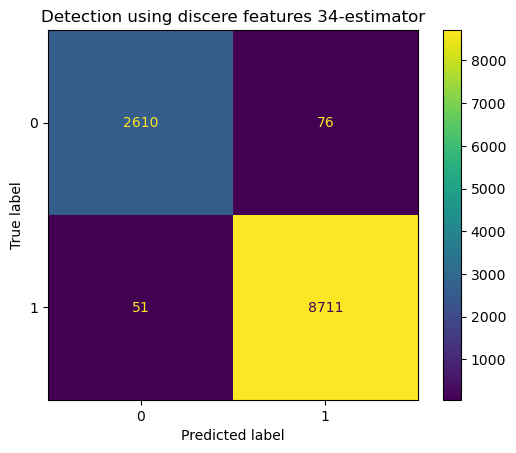

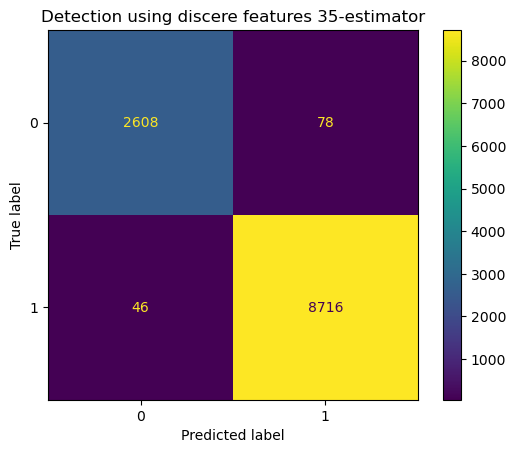

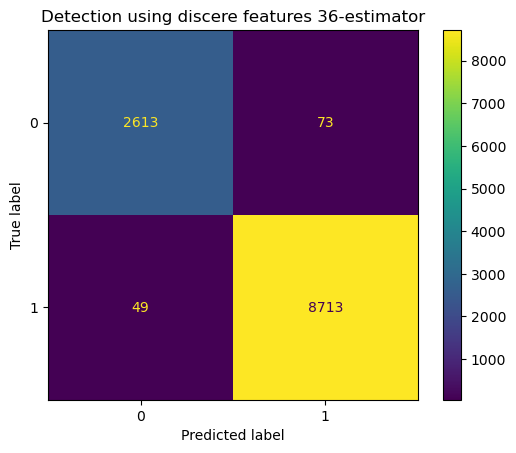

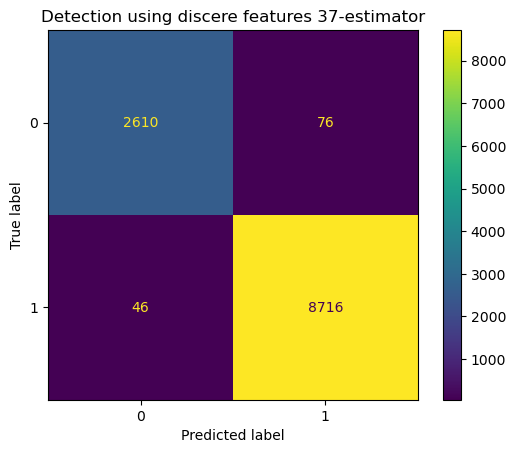

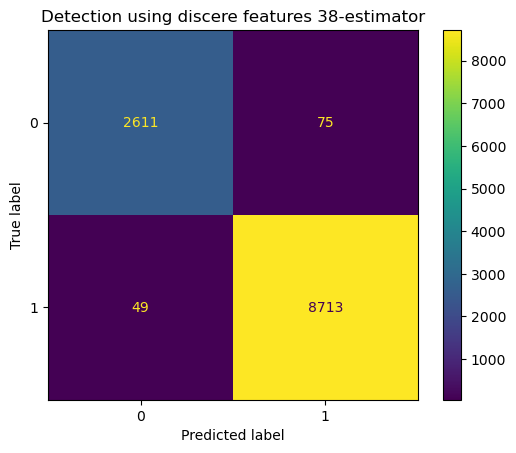

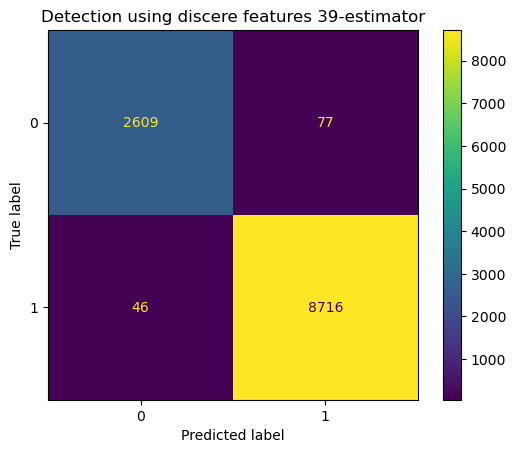

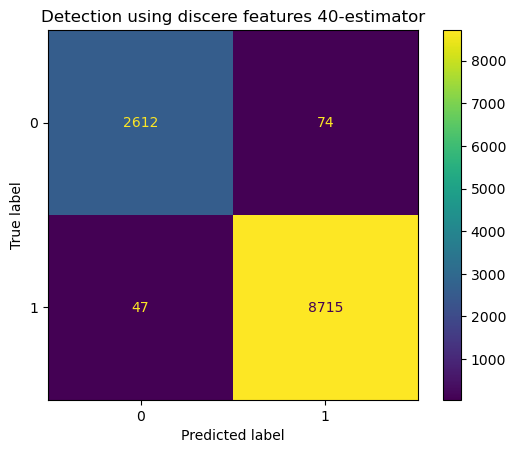

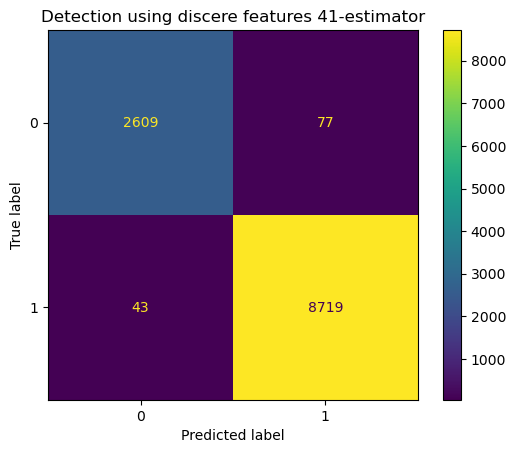

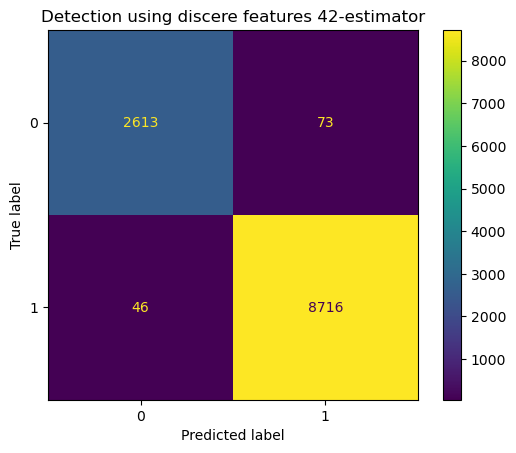

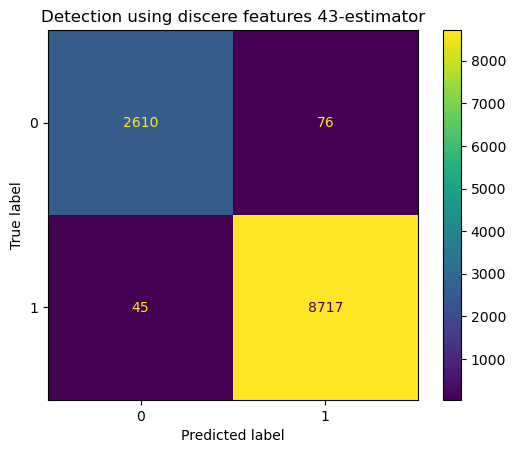

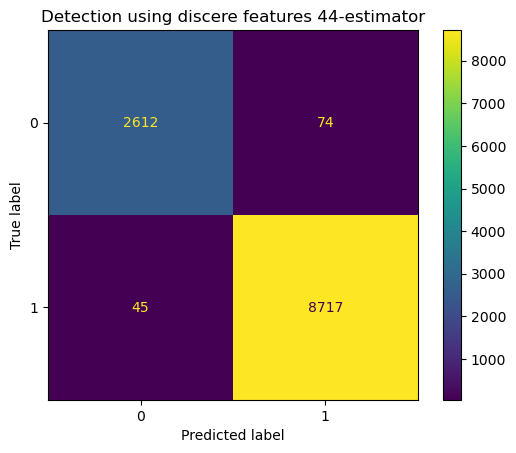

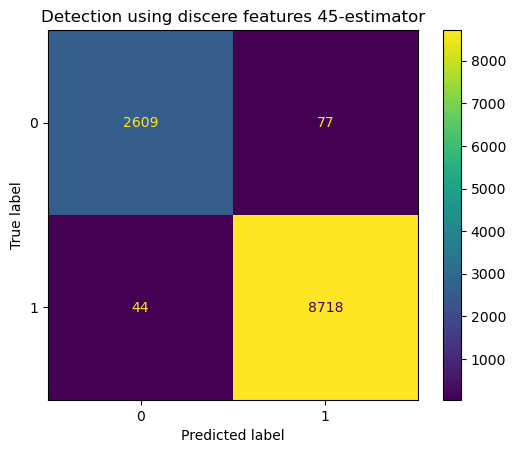

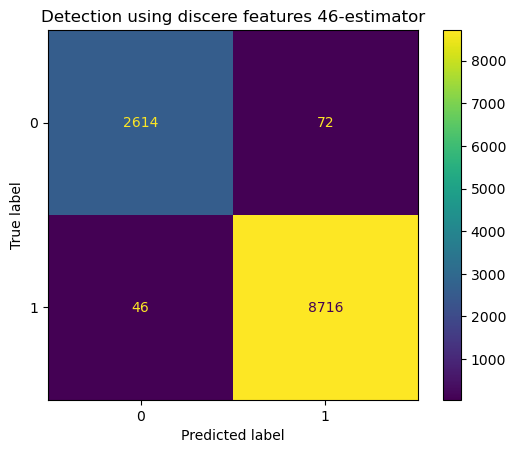

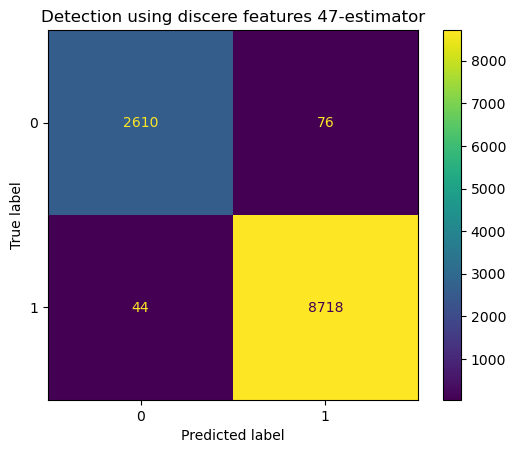

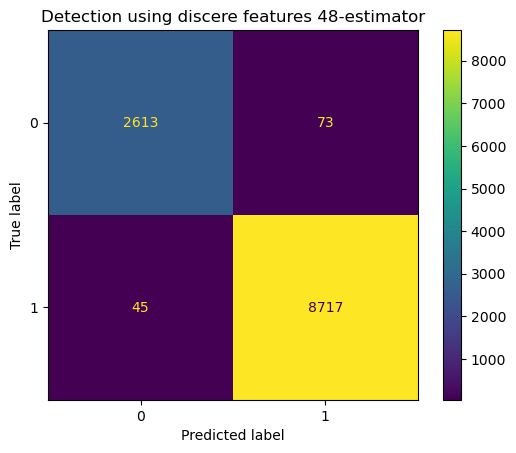

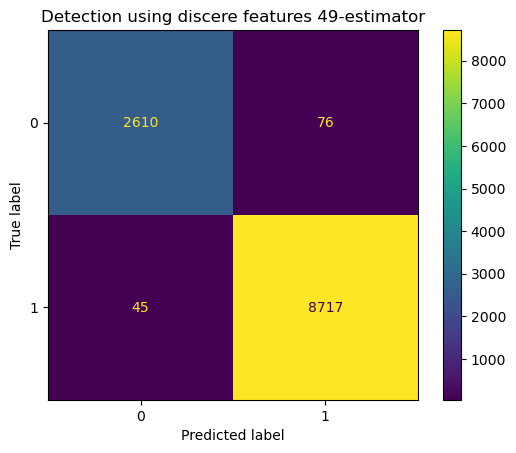

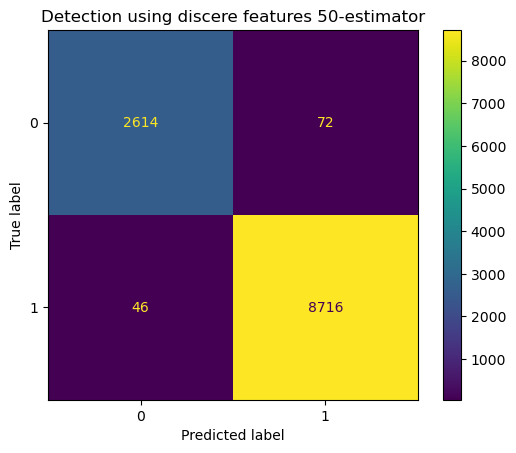

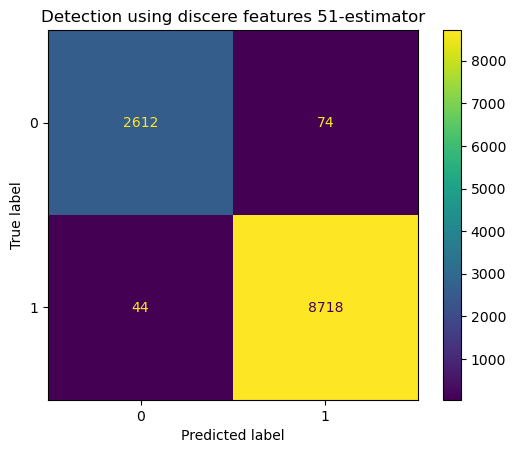

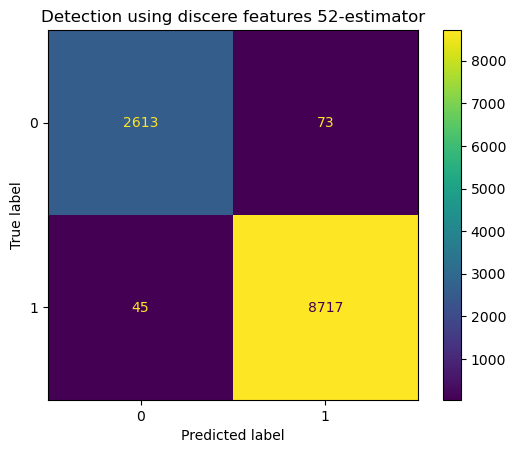

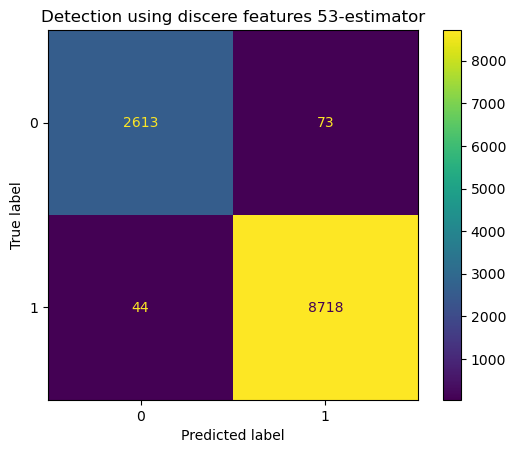

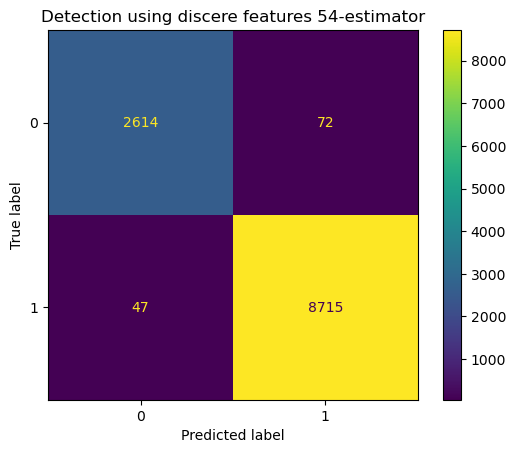

In [62]:
for i in range(54):
    cm=confusion_matrix(y_test,y_pred[i])
    cm_display=ConfusionMatrixDisplay(cm)
    print(f"\nClassification report {i+1}-estimator")
    print(classification_report(y_test, y_pred[i]))
    cm_display.plot()
    cm_display.ax_.set_title(f'Detection using discere features {i+1}-estimator')

### Nilai akurasi model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai akurasi yang terbaik

In [63]:
for i in range(54):
    print(f"Nilai Akurasi untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {acc(y_test,y_pred[i])*100:.5f}%")

Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 1-estimator 98.78581%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 2-estimator 98.64605%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 3-estimator 98.82949%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 4-estimator 98.80328%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 5-estimator 98.79455%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 6-estimator 98.84696%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 7-estimator 98.87317%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 8-estimator 98.87317%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 9-estimator 98.86443%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 10-estimator 98.88190%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 11-estimator 98.87317%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 12-estimator 98.88190%
Nilai Akurasi untuk Ensemble Bagging SVM menggunakan 13-estimator 98.89064%
Nilai Akurasi untuk E

In [64]:
value_acc=[]
for i in range(54):
    value_acc.append(acc(y_test,y_pred[i]))
maks=max(value_acc)
lokasi=value_acc.index(maks)
print(f'Nilai terbesar untuk akurasi adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-acc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai akurasi non-baggingnya' )

Nilai terbesar untuk akurasi adalah 98.97799% dengan menggunakan Ensemble Bagging SVM 53-estimator yang 0.02621% lebih tinggi dari nilai akurasi non-baggingnya


### Nilai Spesifisitas model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai spesifisitas yang terbaik

In [65]:
for i in range(54):
    print(f"Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {spec(y_test,y_pred[i])*100:.5f}%",)

Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 1-estimator 96.87267%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 2-estimator 97.54281%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 3-estimator 97.13328%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 4-estimator 97.39389%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 5-estimator 96.98436%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 6-estimator 97.43112%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 7-estimator 97.17051%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 8-estimator 97.39389%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 9-estimator 97.13328%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 10-estimator 97.35666%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 11-estimator 97.13328%
Nilai Spesifisitas untuk Ensemble Bagging SVM menggunakan 12-estimator 97.39389%
Nilai Spesifisitas untuk Ensemble Bag

In [66]:
value_ps=[]
for i in range(54):
    value_ps.append(spec(y_test,y_pred[i]))
maks=max(value_ps)
lokasi=value_ps.index(maks)
print(f'Nilai terbesar untuk spesifisitas adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-spec(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai spesifisitas non-baggingnya' )

Nilai terbesar untuk spesifisitas adalah 97.54281% dengan menggunakan Ensemble Bagging SVM 2-estimator yang 0.33507% lebih tinggi dari nilai spesifisitas non-baggingnya


### Nilai Recall model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai Recall yang terbaik

In [67]:
for i in range(54):
    print(f"Nilai Recall untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rc(y_test,y_pred[i])*100:.5f}%",)

Nilai Recall untuk Ensemble Bagging SVM menggunakan 1-estimator 99.37229%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 2-estimator 98.98425%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 3-estimator 99.34946%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 4-estimator 99.23533%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 5-estimator 99.34946%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 6-estimator 99.28099%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 7-estimator 99.39512%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 8-estimator 99.32664%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 9-estimator 99.39512%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 10-estimator 99.34946%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 11-estimator 99.40653%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 12-estimator 99.33805%
Nilai Recall untuk Ensemble Bagging SVM menggunakan 13-estimator 99.42935%
Nilai Recall untuk Ensemble Baggin

In [68]:
value_rc=[]
for i in range(54):
    value_rc.append(rc(y_test,y_pred[i]))
maks=max(value_rc)
lokasi=value_rc.index(maks)
print(f'Nilai terbesar untuk recall adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai recall non-baggingnya' )

Nilai terbesar untuk recall adalah 99.50924% dengan menggunakan Ensemble Bagging SVM 41-estimator yang 0.02283% lebih tinggi dari nilai recall non-baggingnya


### Nilai ROC-AUC model SVM Ensemble *bagging* untuk masing-masing n-estimator dengan n = 1,2,3,...,54 beserta n dengan nilai ROC-AUC yang terbaik

In [69]:
for i in range(54):
    print(f"Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan {i+1}-estimator {rocauc(y_test,y_pred[i])*100:.5f}%",)

Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 1-estimator 98.12248%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 2-estimator 98.26353%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 3-estimator 98.24137%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 4-estimator 98.31461%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 5-estimator 98.16691%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 6-estimator 98.35606%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 7-estimator 98.28281%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 8-estimator 98.36027%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 9-estimator 98.26420%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 10-estimator 98.35306%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 11-estimator 98.26991%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 12-estimator 98.36597%
Nilai ROC-AUC untuk Ensemble Bagging SVM menggunakan 13-estimator 98.28132%
Nilai ROC-AUC untuk E

In [70]:
value_rocauc=[]
for i in range(54):
    value_rocauc.append(rocauc(y_test,y_pred[i]))
maks=max(value_rocauc)
lokasi=value_rocauc.index(maks)
print(f'Nilai terbesar untuk ROC-AUC adalah {maks*100:.5f}% dengan menggunakan Ensemble Bagging SVM {lokasi+1}-estimator yang {(maks-rocauc(y_test,y_pred_svm))*100:.5f}% lebih tinggi dari nilai ROC-AUC non-baggingnya' )

Nilai terbesar untuk ROC-AUC adalah 98.40592% dengan menggunakan Ensemble Bagging SVM 20-estimator yang 0.05884% lebih tinggi dari nilai ROC-AUC non-baggingnya


### Mencari peningkatan performa

In [71]:
value_concat = []
t_value_concat = []
value_concat.append(value_acc)
value_concat.append(value_ps)
value_concat.append(value_rc)
value_concat.append(value_rocauc)
for i in range(54):
    temp = []
    for data in value_concat:
        temp.append(data[i])
    t_value_concat.append(temp)
print(t_value_concat)

[[0.9878581411600279, 0.9687267311988086, 0.9937228943163662, 0.9812248127575874], [0.9864605171208944, 0.9754281459419211, 0.9898425017119379, 0.9826353238269294], [0.9882948986722572, 0.9713328369322413, 0.9934946359278704, 0.9824137364300559], [0.9880328441649197, 0.9739389426656738, 0.9923533439853914, 0.9831461433255325], [0.9879454926624738, 0.969843633655994, 0.9934946359278704, 0.9816691347919322], [0.9884696016771488, 0.9743112434847356, 0.992809860762383, 0.9835605521235592], [0.9887316561844863, 0.9717051377513031, 0.9939511527048619, 0.9828281452280826], [0.9887316561844863, 0.9739389426656738, 0.9932663775393745, 0.9836026601025242], [0.9886443046820406, 0.9713328369322413, 0.9939511527048619, 0.9826419948185516], [0.9888190076869322, 0.973566641846612, 0.9934946359278704, 0.9835306388872412], [0.9887316561844863, 0.9713328369322413, 0.9940652818991098, 0.9826990594156756], [0.9888190076869322, 0.9739389426656738, 0.9933805067336224, 0.9836597246996481], [0.988906359189378

In [72]:
value_svm = [acc(y_test,y_pred_svm),spec(y_test,y_pred_svm),rc(y_test,y_pred_svm),rocauc(y_test,y_pred_svm)]
for data in t_value_concat:
    for i in range(4):
        data[i]-=value_svm[i]
for i in range(54):
    print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa {t_value_concat[i][0]} akurasi, {t_value_concat[i][1]} spesifisitas, {t_value_concat[i][2]} sensitivitas, dan {t_value_concat[i][3]} ROC-AUC')

Untuk 1-estimator menghasilkan peningkatan performa -0.0016596785464710884 akurasi, -0.003350707371556294 spesifisitas, -0.001141291942478806 sensitivitas, dan -0.002245999657017439 ROC-AUC
Untuk 2-estimator menghasilkan peningkatan performa -0.003057302585604549 akurasi, 0.003350707371556183 spesifisitas, -0.005021684546907101 sensitivitas, dan -0.0008354885876754592 ROC-AUC
Untuk 3-estimator menghasilkan peningkatan performa -0.0012229210342418195 akurasi, -0.0007446016381236209 spesifisitas, -0.0013695503309746337 sensitivitas, dan -0.0010570759845489608 ROC-AUC
Untuk 4-estimator menghasilkan peningkatan performa -0.0014849755415793364 akurasi, 0.0018615040953089412 spesifisitas, -0.0025108422734535507 sensitivitas, dan -0.00032466908907236025 ROC-AUC
Untuk 5-estimator menghasilkan peningkatan performa -0.0015723270440252124 akurasi, -0.0022338049143708627 spesifisitas, -0.0013695503309746337 sensitivitas, dan -0.0018016776226726927 ROC-AUC
Untuk 6-estimator menghasilkan peningkatan

In [73]:
def cekdilist(list,nol):
    for i in list:
        if i<0:
            return False
    return True

bestloc = []
for i in range(54):
    if cekdilist(t_value_concat[i],0)==True:
        print(f'Untuk {i+1}-estimator menghasilkan peningkatan performa yang definit positif yaitu {t_value_concat[i][0]*100:.5f}% akurasi, {t_value_concat[i][1]*100:.5f}% spesifisitas, {t_value_concat[i][2]*100:.5f}% sensitivitas, dan {t_value_concat[i][3]*100:.5f}% ROC-AUC dengan totalnya {t_value_concat[i][0]*100+t_value_concat[i][1]*100+t_value_concat[i][2]*100+t_value_concat[i][3]*100:.5f}%')
        bestloc.append(i)

Untuk 44-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.00874% akurasi, 0.03723% spesifisitas, 0.00000% sensitivitas, dan 0.01862% ROC-AUC dengan totalnya 0.06458%
Untuk 48-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.01747% akurasi, 0.07446% spesifisitas, 0.00000% sensitivitas, dan 0.03723% ROC-AUC dengan totalnya 0.12916%
Untuk 51-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.01747% akurasi, 0.03723% spesifisitas, 0.01141% sensitivitas, dan 0.02432% ROC-AUC dengan totalnya 0.09043%
Untuk 52-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.01747% akurasi, 0.07446% spesifisitas, 0.00000% sensitivitas, dan 0.03723% ROC-AUC dengan totalnya 0.12916%
Untuk 53-estimator menghasilkan peningkatan performa yang definit positif yaitu 0.02621% akurasi, 0.07446% spesifisitas, 0.01141% sensitivitas, dan 0.04294% ROC-AUC dengan totalnya 0.15502%


### Menyimpan model

In [34]:
import joblib

for i in range(54):
    joblib.dump(clf[i], f'Ensemble Bagging SVM menggunakan {i+1}-estimator.pkl')

### Menyimpan splitted data dan y_prediksi

In [35]:
y_pred

[array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dt

In [36]:
df_ypred = pd.DataFrame(y_pred)
df_ypred = df_ypred.transpose()
df_ypred

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3814,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [37]:
df_ypredsvm = pd.DataFrame(y_pred_svm)
df_ypredsvm

,0
0,1
1,1
2,0
3,1
4,1
...,...
3811,1
3812,0
3813,0
3814,1


In [38]:
kolompred = [f'{n}-estimator' for n in range(54)]
kolompred.append('ypredsvm')
print(kolompred)

['0-estimator', '1-estimator', '2-estimator', '3-estimator', '4-estimator', '5-estimator', '6-estimator', '7-estimator', '8-estimator', '9-estimator', '10-estimator', '11-estimator', '12-estimator', '13-estimator', '14-estimator', '15-estimator', '16-estimator', '17-estimator', '18-estimator', '19-estimator', '20-estimator', '21-estimator', '22-estimator', '23-estimator', '24-estimator', '25-estimator', '26-estimator', '27-estimator', '28-estimator', '29-estimator', '30-estimator', '31-estimator', '32-estimator', '33-estimator', '34-estimator', '35-estimator', '36-estimator', '37-estimator', '38-estimator', '39-estimator', '40-estimator', '41-estimator', '42-estimator', '43-estimator', '44-estimator', '45-estimator', '46-estimator', '47-estimator', '48-estimator', '49-estimator', '50-estimator', '51-estimator', '52-estimator', '53-estimator', 'ypredsvm']


In [39]:
df_ypredicted = pd.concat([df_ypred,df_ypredsvm],axis=1)
df_ypredicted.columns=kolompred
df_ypredicted.to_csv('df_ypredicted.csv', index=False)

In [40]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.to_csv('df_xtrain.csv', index=False)
df_xtest = pd.DataFrame(x_test)
df_xtest.to_csv('df_xtest.csv', index=False)
df_ytrain = pd.DataFrame(y_train)
df_ytrain.to_csv('df_ytrain.csv', index=False)
df_ytest = pd.DataFrame(y_test)
df_ytest.to_csv('df_ytest.csv', index=False)

# Generate kalimat skripsi

In [41]:
print('Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}%. Berikut adalah confusion matriks dari model tersebut.'.format(acc(y_test,y_pred_svm)*100,rc(y_test,y_pred_svm)*100,spec(y_test,y_pred_svm)*100,rocauc(y_test,y_pred_svm)*100))

Pada eksperimen hanya menggunakan model SVM, model tersebut memberikan hasil klasifikasi yang cukup baik dengan akurasi 99.24%, sensitivitas 99.66%, spesifisitas 97.73%, dan nilai ROC-AUC 98.70%. Berikut adalah confusion matriks dari model tersebut.


In [42]:
best=[11,22,35,37]
for i in best:
    print("Pada eksperimen menggunakan model Ensemble bagging SVM {}-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi {:.2f}%, sensitivitas {:.2f}%, spesifisitas {:.2f}%, dan nilai ROC-AUC {:.2f}% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.".format(i+1,acc(y_test,y_pred[i])*100,rc(y_test,y_pred[i])*100,spec(y_test,y_pred[i])*100,rocauc(y_test,y_pred[i])*100))

Pada eksperimen menggunakan model Ensemble bagging SVM 12-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.11%, sensitivitas 99.53%, spesifisitas 97.61%, dan nilai ROC-AUC 98.57% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 23-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.19%, sensitivitas 99.60%, spesifisitas 97.73%, dan nilai ROC-AUC 98.66% dengan peningkatan kuantitatif untuk setiap evaluasi metrik ada pada tabel berikut.
Pada eksperimen menggunakan model Ensemble bagging SVM 36-estimator, model tersebut memberikan hasil klasifikasi dengan performa yang meningkat dibandingkan dengan hanya menggunakan model SVM. Model ini menghasilkan akurasi 99.16%, se